In [38]:
import tensorflow
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [20]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of x_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


In [21]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

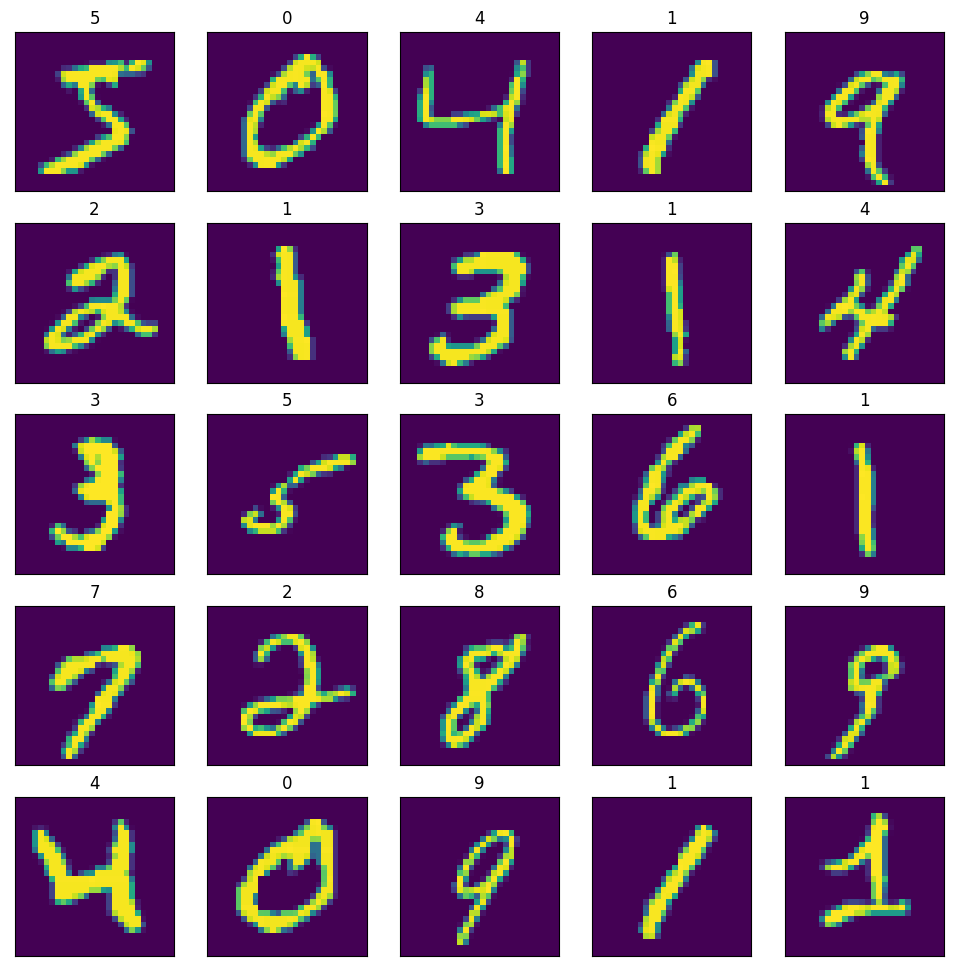

In [30]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

In [33]:
x_train = x_train/255
x_test = x_test/255

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

In [35]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_valid: ",x_valid.shape)
print("Shape of y_valid: ",y_valid.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (48000, 28, 28)
Shape of y_train:  (48000,)
Shape of x_valid:  (12000, 28, 28)
Shape of y_valid:  (12000,)
Shape of x_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


In [44]:
classes =  len(np.unique(y_train))
classes

10

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [50]:
LAYERS = [
    tensorflow.keras.layers.Flatten(input_shape=(28,28), name="Input_Layer"),
    tensorflow.keras.layers.Dense(300, activation = 'relu', name="Hidden_Layer_01"),
    tensorflow.keras.layers.Dense(100, activation = 'relu', name="Hidden_Layer_02"),
    tensorflow.keras.layers.Dense(classes, activation = 'softmax', name="Output_Layer")
]

In [51]:
model_clf = Sequential(LAYERS)
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer_01 (Dense)      (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_02 (Dense)      (None, 100)               30100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [54]:
EPOCHS = 10
VALIDATION = (x_valid, y_valid)

LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZERS = 'SGD'
METRICS = ['accuracy']

model_clf.compile(loss = LOSS_FUNCTION, optimizer = OPTIMIZERS, metrics = METRICS)

history = model_clf.fit(x_train, y_train,
                       epochs = EPOCHS,
                       validation_data= VALIDATION,
                       batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6635 - accuracy: 0.8317 - val_loss: 0.3523 - val_accuracy: 0.8992
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2986 - accuracy: 0.9153 - val_loss: 0.2787 - val_accuracy: 0.9202
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2448 - accuracy: 0.9302 - val_loss: 0.2450 - val_accuracy: 0.9284
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2108 - accuracy: 0.9402 - val_loss: 0.2127 - val_accuracy: 0.9373
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1862 - accuracy: 0.9473 - val_loss: 0.1944 - val_accuracy: 0.9413
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1661 - accuracy: 0.9525 - val_loss: 0.1778 - val_accuracy: 0.9490
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1504 - accuracy: 0.9577 - val_loss: 0.1644 - val_accuracy:

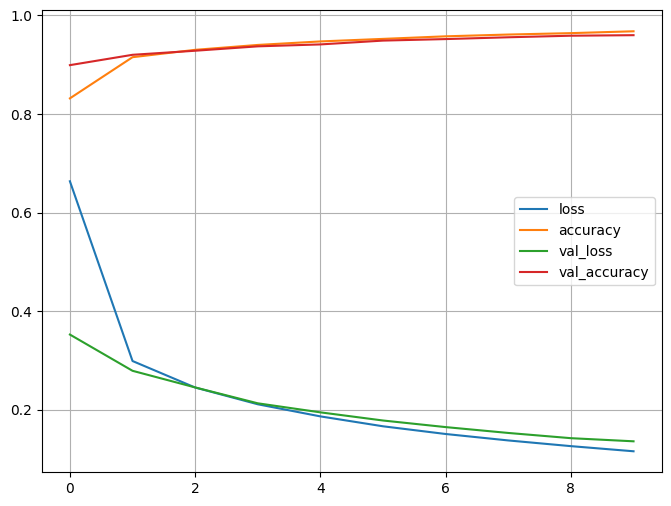

In [58]:
pd.DataFrame(history.history).plot(figsize=(8,6))
plt.grid(True)
plt.show()

In [59]:
model_clf.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1234 - accuracy: 0.9638


[0.123382069170475, 0.9638000130653381]

In [60]:
model_clf.save("MNIST_Model.h5")

In [61]:
y_pred = model_clf.predict(x_test)

In [62]:
y_pred[0]

array([5.0958183e-06, 2.4430156e-07, 7.5061608e-04, 1.5519870e-03,
       5.5640993e-07, 3.9401530e-05, 1.0004767e-09, 9.9761921e-01,
       1.4347512e-05, 1.8464098e-05], dtype=float32)

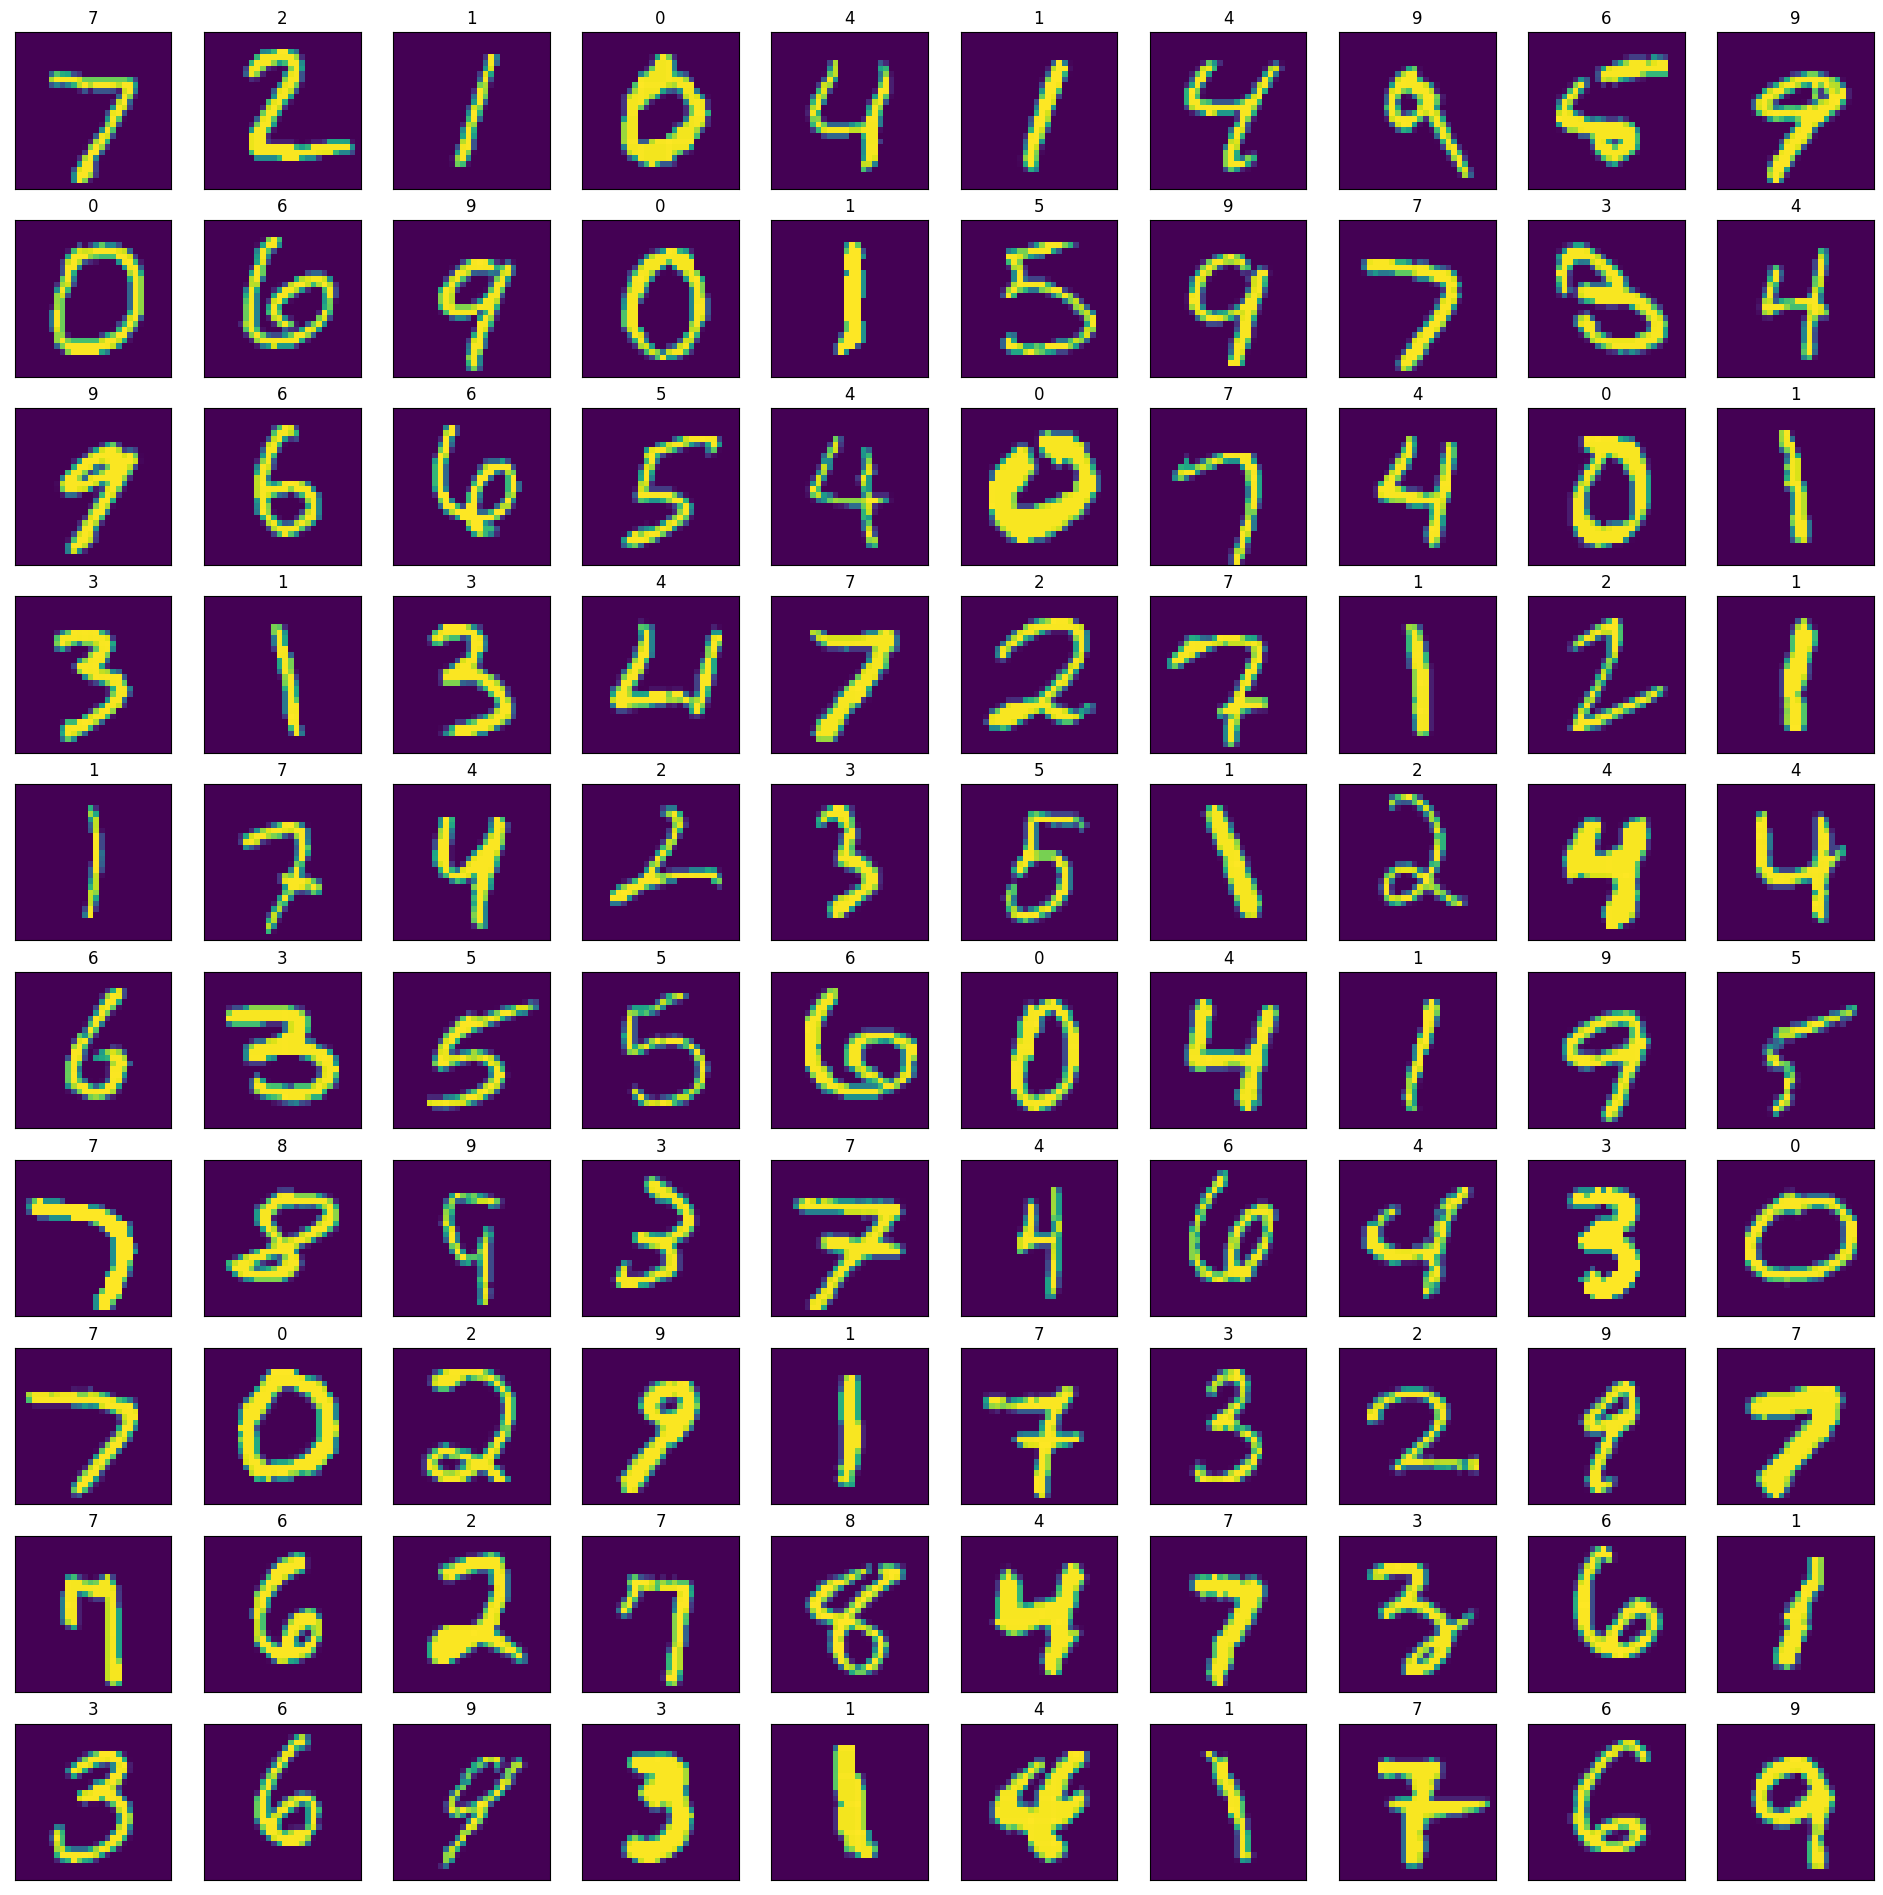

In [64]:
plt.figure(figsize=(24,24))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_test[i])
    plt.title(np.argmax(y_pred[i]))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

# Transfer Learning

In [65]:
pre_trained_model = tensorflow.keras.models.load_model("MNIST_Model.h5")
pre_trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer_01 (Dense)      (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_02 (Dense)      (None, 100)               30100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [70]:
for layer in pre_trained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

Input_Layer: True
Hidden_Layer_01: True
Hidden_Layer_02: True
Output_Layer: True


In [71]:
for layer in pre_trained_model.layers[:-1]:
    print(f"{layer.name}: {layer.trainable}")

Input_Layer: True
Hidden_Layer_01: True
Hidden_Layer_02: True


In [72]:
lower_pre_trained_model = pre_trained_model.layers[:-1]

In [73]:
new_model = tensorflow.keras.models.Sequential(lower_pre_trained_model)
new_model.add(tensorflow.keras.layers.Dense(2, activation = "softmax"))

In [74]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer_01 (Dense)      (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_02 (Dense)      (None, 100)               30100     
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 265,802
Trainable params: 265,802
Non-trainable params: 0
_________________________________________________________________


In [75]:
def even_odd_layers(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0)
    return labels

In [76]:
y_train_update, y_test_update, y_valid_update = even_odd_layers([y_train, y_test, y_valid])

In [77]:
np.unique(y_valid_update)

array([0, 1])

In [79]:
y_train_update[0:50]

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0])

In [81]:
new_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'SGD', metrics=['accuracy'])
history = new_model.fit(x_train, y_train_update, epochs=10, validation_data = (x_valid, y_valid_update), batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1493 - accuracy: 0.9477 - val_loss: 0.0987 - val_accuracy: 0.9688
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0851 - accuracy: 0.9717 - val_loss: 0.0804 - val_accuracy: 0.9727
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0696 - accuracy: 0.9761 - val_loss: 0.0711 - val_accuracy: 0.9772
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0598 - accuracy: 0.9801 - val_loss: 0.0635 - val_accuracy: 0.9793
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0530 - accuracy: 0.9822 - val_loss: 0.0577 - val_accuracy: 0.9812
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0474 - accuracy: 0.9846 - val_loss: 0.0555 - val_accuracy: 0.9803
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0432 - accuracy: 0.9859 - val_loss: 0.0530 - val_accuracy:

In [83]:
new_model.evaluate(x_test, y_test_update)

313/313 [==============================] - 1s 2ms/step - loss: 0.0418 - accuracy: 0.9848


[0.04177352413535118, 0.9847999811172485]

In [84]:
new_model.save("MNIST_Transfer_Learning_Model.h5")

In [86]:
y_pred_new = new_model.predict(x_test)

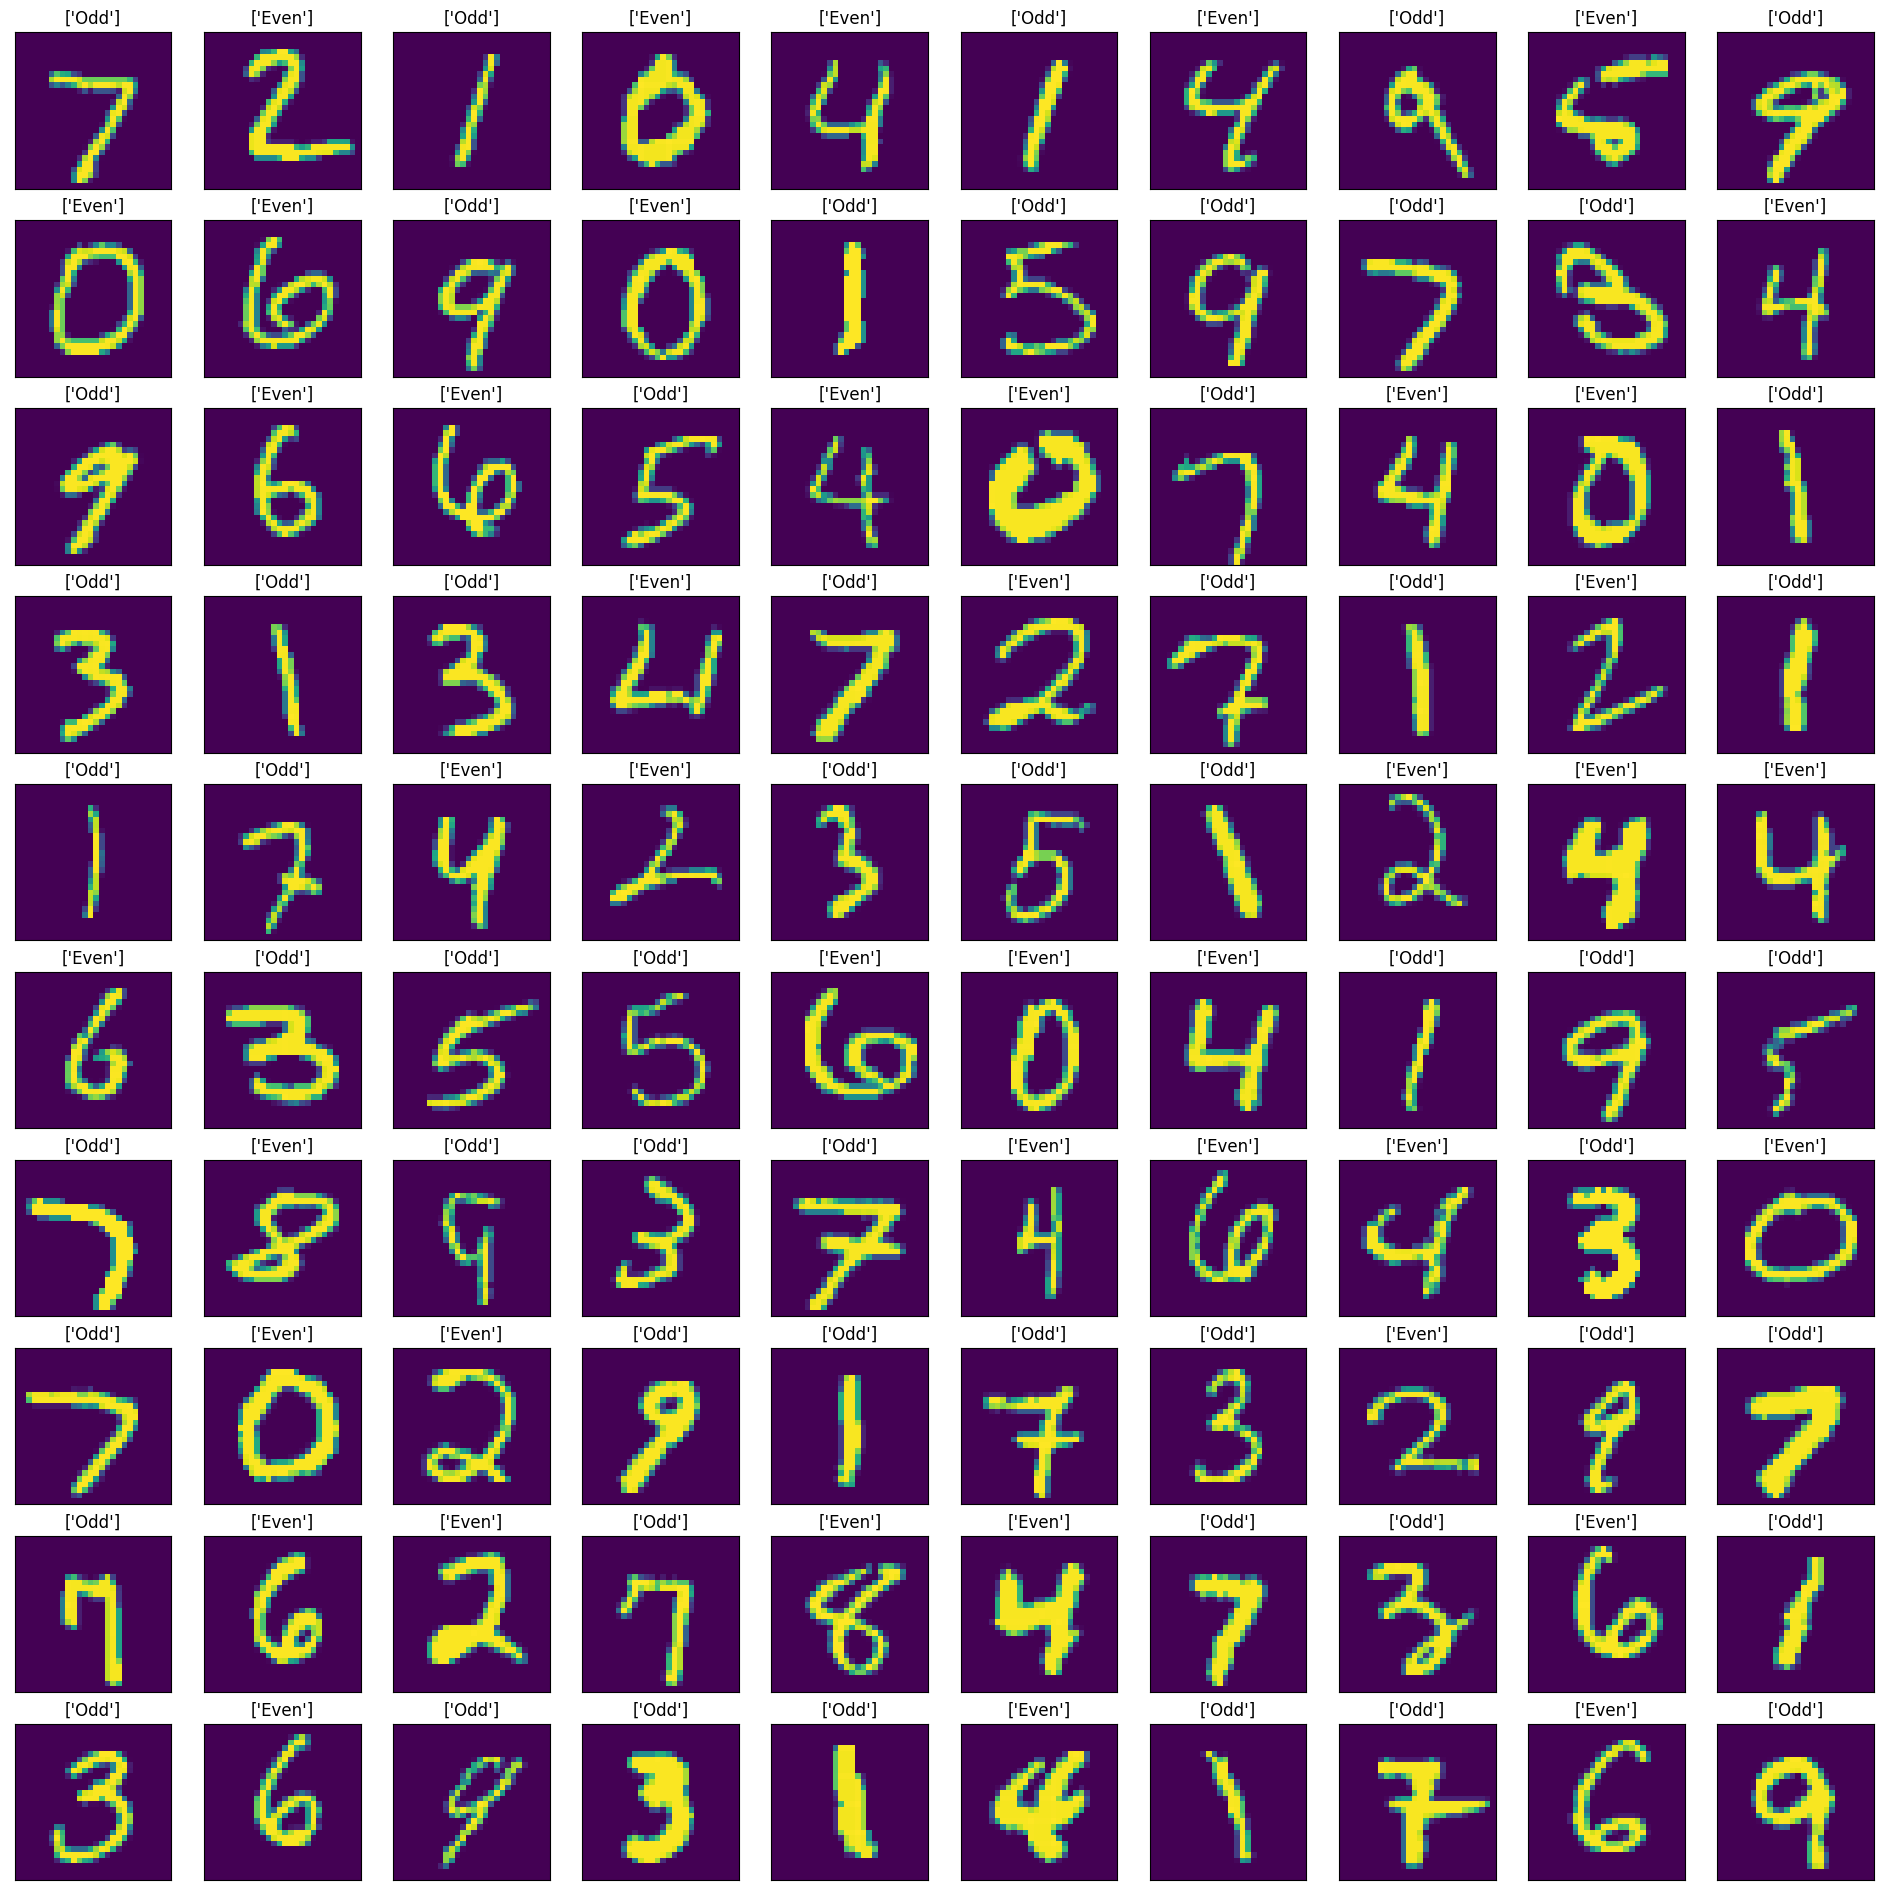

In [88]:
plt.figure(figsize=(24,24))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_test[i])
    plt.title(["Odd" if np.argmax(y_pred_new[i])==0 else "Even"])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])